Comparing GDP to Educational Attainment

The purpose of this project is to determine whether there is a correlation between GDP and school life expectancy. Is the wealth of a country an indicator of how long its students remain in school? 

The first step is to scrape the education data from the United Nations Statistics Devision website. The data below divides school life expectancy into two groups, male and female.

In [1]:
from bs4 import BeautifulSoup
import requests

In [14]:
url = "http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm"

r = requests.get(url)

soup = BeautifulSoup(r.content)

for row in soup('table'):
    print row

<table style="width:100%;"><tbody><tr>
<td id="wm-logo">
<a href="/web/" title="Wayback Machine home page"><img alt="Wayback Machine" border="0" height="39" src="/static/images/toolbar/wayback-toolbar-logo.png" width="110"/></a>
</td>
<td class="c">
<table style="margin:0 auto;"><tbody><tr>
<td class="u" colspan="2">
<form action="/web/form-submit.jsp" id="wmtb" method="get" name="wmtb" target="_top"><input id="wmtbURL" name="url" onfocus="this.focus();this.select();" style="width:400px;" type="text" value="http://unstats.un.org/unsd/demographic/products/socind/education.htm"/><input name="type" type="hidden" value="replay"/><input name="date" type="hidden" value="20110514112442"/><input type="submit" value="Go"/><span id="wm_tb_options" style="display:block;"></span></form>
</td>
<td class="n" rowspan="2">
<table><tbody>
<!-- NEXT/PREV MONTH NAV AND MONTH INDICATOR -->
<tr class="m">
<td class="b" nowrap="nowrap">
<a href="/web/20100819143645/http://unstats.un.org/unsd/demographic/pro

In [15]:
data = soup('table')[6]
print data

<table border="0" cellpadding="0" cellspacing="0" width="800">
<tr valign="top">
<td><!-- #BeginEditable "MainContent" -->
<table align="center" border="0" width="540">
<tr>
<td cllcontsubhd="" colspan="2" valign="bottom"><h2 align="center"><a name="Top"></a>Social 
              indicators </h2></td>
</tr>
<tr>
<td cllcontsubhd="" colspan="2" height="23" valign="top"><div align="center" class="csubhd"><a href="default.htm">Introduction</a> 
              | <a href="statistics.htm">Statistics</a></div></td>
</tr>
</table>
<table cellpadding="0" cellspacing="0">
<tr>
<td height="1" width="797"><div align="right">
<p class="Clear"><a href="Education_Dec2010.xls" style="color: #666; font-weight: bold">Download data</a> <a href="Education_Dec2010.xls"><img alt="Excel" border="0" height="21" name="Excel" src="/web/20110514112442im_/http://unstats.un.org/unsd/img/excel.gif" width="22"/></a></p>
<div align="left">
<table align="left" cellpadding="0" cellspacing="0">
<tr class="bar1">
<td cols

In [93]:
data.find_all("td", height="19", text=True)

[<td height="19" width="281"><span style="color: #336699">Country or area</span></td>,
 <td height="19" width="87"><div align="right" style="color: #336699">Year</div></td>,
 <td colspan="3" height="19"><div align="center" style="color: #336699">Total</div></td>,
 <td colspan="3" height="19"><div align="center" style="color: #336699">Men</div></td>,
 <td colspan="2" height="19"><div align="center" style="color: #336699">Women</div></td>,
 <td height="19">Afghanistan</td>,
 <td align="right" height="19">2004</td>,
 <td height="19"> </td>,
 <td height="19">a</td>,
 <td align="right" height="19" width="71">8</td>,
 <td align="right" height="19" width="72">11</td>,
 <td align="right" height="19" width="64">5</td>,
 <td height="19">Albania</td>,
 <td align="right" height="19">2004</td>,
 <td height="19"> </td>,
 <td height="19">a</td>,
 <td align="right" height="19">11</td>,
 <td align="right" height="19">11</td>,
 <td align="right" height="19">11</td>,
 <td height="19">Algeria</td>,
 <td a

In [113]:
lzt = []
for node in data.find_all("td", height="19", text=True):
     lzt.append(''.join(node.find_all(text=True)))
lzt = [i for i in lzt if i not in (u'\xa0',u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h')]
lzt2 = [lzt[i:i+5] for i in range(0, len(lzt), 5)]
lzt2

[[u'Country or area', u'Year', u'Total', u'Men', u'Women'],
 [u'Afghanistan', u'2004', u'8', u'11', u'5'],
 [u'Albania', u'2004', u'11', u'11', u'11'],
 [u'Algeria', u'2005', u'13', u'13', u'13'],
 [u'Andorra', u'2008', u'11', u'11', u'12'],
 [u'Anguilla', u'2008', u'11', u'11', u'11'],
 [u'Antigua and Barbuda', u'2000', u'14', u'12', u'16'],
 [u'Argentina', u'2007', u'16', u'15', u'17'],
 [u'Armenia', u'2009', u'12', u'12', u'13'],
 [u'Aruba', u'2009', u'13', u'13', u'13'],
 [u'Australia', u'2008', u'21', u'20', u'21'],
 [u'Austria', u'2008', u'15', u'15', u'15'],
 [u'Azerbaijan', u'2008', u'13', u'13', u'13'],
 [u'Bahrain', u'2006', u'14', u'14', u'15'],
 [u'Bangladesh', u'2007', u'8', u'8', u'8'],
 [u'Belarus', u'2007', u'15', u'14', u'15'],
 [u'Belgium', u'2008', u'16', u'16', u'16'],
 [u'Belize', u'2009', u'12', u'12', u'13'],
 [u'Benin', u'2001', u'9', u'10', u'6'],
 [u'Bermuda', u'2006', u'12', u'12', u'12'],
 [u'Bhutan', u'2008', u'11', u'11', u'11'],
 [u'Bolivia (Plurinational

In [127]:
import pandas as pd

df = pd.DataFrame(lzt2)

In [140]:
df.columns = df.iloc[0]
df_final = df[1:184]
df_final.to_csv('education.csv', encoding='utf-8')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 183
Data columns (total 5 columns):
Country or area    183 non-null object
Year               183 non-null object
Total              183 non-null object
Men                183 non-null object
Women              183 non-null object
dtypes: object(5)
memory usage: 8.6+ KB


In [23]:
df_final.head()

,Unnamed: 0,Country or area,Year,Total,Men,Women
0,1,Afghanistan,2004,8,11,5
1,2,Albania,2004,11,11,11
2,3,Algeria,2005,13,13,13
3,4,Andorra,2008,11,11,12
4,5,Anguilla,2008,11,11,11


In [66]:
import pandas as pd
%matplotlib inline

df_final = pd.read_csv('education.csv')
del df_final['Unnamed: 0']
df_final.describe()

,Year,Total,Men,Women
count,183.000000,183.000000,183.000000,183.000000
mean,2006.672131,12.448087,12.393443,12.513661
std,2.600008,3.053782,2.668160,3.683730
min,1999.000000,5.000000,5.000000,4.000000
25%,2005.500000,10.500000,11.000000,10.000000
50%,2008.000000,13.000000,12.000000,13.000000
75%,2008.000000,15.000000,14.000000,15.000000
max,2010.000000,21.000000,20.000000,21.000000


In [69]:
Men_sum = df_final.Men.sum()
Women_sum = df_final.Women.sum()
Men_sum, Women_sum

(2268L, 2290L)

A first look at the educational life expectancy data shows that women on average spend a small amount more time in school than men, with a mean of 12.5 compared with 12.4. The median for women is 13, while for men it is 12. Summing the columns, across the observed countries the women spend 2,290 years in school while the men spend 2,268.

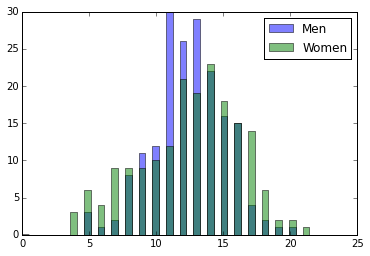

In [65]:
import matplotlib.pyplot as plt
import numpy


bins = numpy.linspace(0, 25, 50)

Men = df_final.Men
Women = df_final.Women

plt.hist(Men, bins, alpha=0.5)
plt.hist(Women, bins, alpha=0.5)
plt.legend(['Men','Women'])
plt.show()

This histogram shows the distribution of school life expectancy across all observed countries, split between men and women. The data for women is slightly more evenly distributed across the range, whereas the data for men spikes between 11-13 years. The below boxplot also shows this fact, as the range between 25th and 75th percentiles is larger for women than it is for men. 

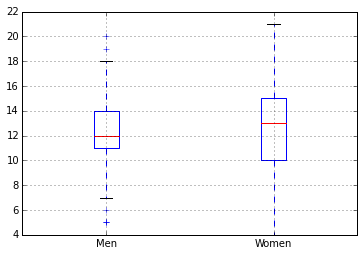

In [33]:
df_final.boxplot(column=['Men','Women'], return_type='axes')

The next step will be to bring in the relevant GDP data from the World Bank.

In [35]:
gdp = pd.read_csv('gdp.csv')
gdp.head()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,1722798883,1873452514,1920262570,1941094972,2021301676,2228279330,2331005587,2421474860,2623726257,2791960894,2498932961,2467703911
1,Andorra,1239840270,1401694156,1484004617,1717563533,2373836214,2916913449,3248134607,3536451646,4010785102,4001349340,3649863493,3346317329
2,Afghanistan,NaN,NaN,2461666315,4128818042,4583648922,5285461999,6275076016,7057598407,9843842455,10190529882,12486943506,15936800636
3,Angola,6152936539,9129634978,8936063723,15285594828,17812704825,23552047248,36970918699,52381006892,65266452081,88538611205,73157893410,83369475451
4,Albania,3414760915,3632043908,4060758804,4435078648,5746945913,7314865176,8158548717,8992642349,10701011896,12881352688,12044212904,11926953259


In [36]:
gdp_m = pd.melt(gdp, id_vars='Country Name', var_name='Year', value_name='GDP')
gdp_m = gdp_m.sort(['Country Name','Year']).reset_index(drop=True)
gdp_m = gdp_m.convert_objects(convert_numeric=True)
gdp_m.head(6)

,Country Name,Year,GDP
0,Afghanistan,1999,NaN
1,Afghanistan,2000,NaN
2,Afghanistan,2001,2461666315
3,Afghanistan,2002,4128818042
4,Afghanistan,2003,4583648922
5,Afghanistan,2004,5285461999


In [37]:
df_final.rename(columns={'Country or area':'Country Name'}, inplace=True)
df_merged = pd.merge(df_final, gdp_m, on=['Country Name','Year'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 6 columns):
Country Name    149 non-null object
Year            149 non-null int64
Total           149 non-null int64
Men             149 non-null int64
Women           149 non-null int64
GDP             147 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 8.1+ KB


Two countries did not have GDP data to match, so the next step removes them from the data.

In [38]:
df_merged = df_merged.sort(columns='GDP').reset_index(drop=True)
df_a = df_merged[:-2]
df_a.tail()

,Country Name,Year,Total,Men,Women,GDP
142,Brazil,2008,14,14,14,1.694590e+12
143,Italy,2008,16,16,17,2.391880e+12
144,France,2008,16,16,16,2.923470e+12
145,China,2008,11,11,12,4.558430e+12
146,Japan,2008,15,15,15,4.849180e+12


A log transform was performed on the matched GDP column to normalize the data due to its wide range.

In [39]:
import math


g = lambda x: math.log(x)
gdp_log = df_a['GDP'].map(g)
df_a['GDP_log'] = gdp_log

C:\Users\Matt\Anaconda\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
df_a.head()

,Country Name,Year,Total,Men,Women,GDP,GDP_log
0,Tuvalu,2001,11,10,11,1.319625e+07,16.395444
1,Kiribati,2008,12,12,12,1.350445e+08,18.721115
2,Palau,2000,15,14,15,1.500747e+08,18.826644
3,Sao Tome and Principe,2010,11,11,11,1.951761e+08,19.089413
4,Tonga,2004,14,14,14,2.362474e+08,19.280390


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A1EF978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A815C50>]], dtype=object)

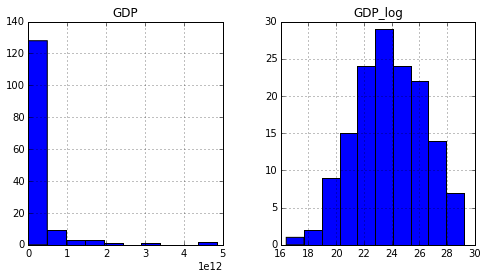

In [41]:
df_a.hist(column=['GDP','GDP_log'],figsize=(8,4))

Finally, a linear regression was run comparing GDP to the educational life expectancy for men, women, and the total, to find if there is a correlation.

In [42]:
import statsmodels.formula.api as smf


model = smf.ols('GDP_log ~ Men', data=df_a).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GDP_log   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     47.73
Date:                Sun, 03 Jan 2016   Prob (F-statistic):           1.43e-10
Time:                        19:15:36   Log-Likelihood:                -322.12
No. Observations:                 147   AIC:                             648.2
Df Residuals:                     145   BIC:                             654.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.1028      0.848     21.360      0.000        16.428    19.778
Men            0.4604      0.067      6.908      0.000         0.329     0.592
==============================================================================
Omnibus:                        5.310   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.835
Skew:                          -0.386   Prob(JB):                       0.0892
Kurtosis:                       3.440   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model2 = smf.ols('GDP_log ~ Women', data=df_a).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GDP_log   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     39.13
Date:                Sun, 03 Jan 2016   Prob (F-statistic):           4.21e-09
Time:                        19:15:41   Log-Likelihood:                -325.48
No. Observations:                 147   AIC:                             655.0
Df Residuals:                     145   BIC:                             660.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.9451      0.647     30.834      0.000        18.667    21.224
Women          0.3111      0.050      6.255      0.000         0.213     0.409
==============================================================================
Omnibus:                        5.048   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.544
Skew:                          -0.387   Prob(JB):                        0.103
Kurtosis:                       3.376   Cond. No.                         46.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model3 = smf.ols('GDP_log ~ Total', data=df_a).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GDP_log   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     39.76
Date:                Sun, 03 Jan 2016   Prob (F-statistic):           3.27e-09
Time:                        21:03:12   Log-Likelihood:                -325.23
No. Observations:                 147   AIC:                             654.5
Df Residuals:                     145   BIC:                             660.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.1239      0.768     24.908      0.000        17.606    20.641
Total          0.3770      0.060      6.305      0.000         0.259     0.495
==============================================================================
Omnibus:                        5.034   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.554
Skew:                          -0.370   Prob(JB):                        0.103
Kurtosis:                       3.444   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

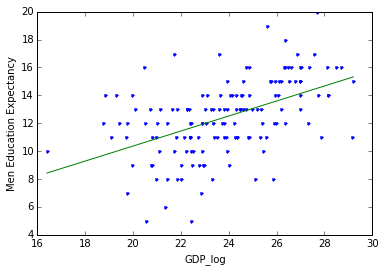

In [72]:
import numpy as np
import matplotlib.pyplot as plt

x = df_a.GDP_log
y = df_a.Men

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.xlabel('GDP_log')
plt.ylabel('Men Education Expectancy')

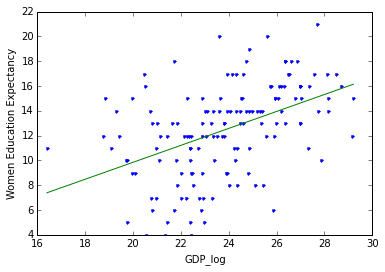

In [73]:
x1 = df_a.GDP_log
y1 = df_a.Women

m, b = np.polyfit(x1, y1, 1)

plt.plot(x1, y1, '.')
plt.plot(x1, m*x1 + b, '-')
plt.xlabel('GDP_log')
plt.ylabel('Women Education Expectancy')

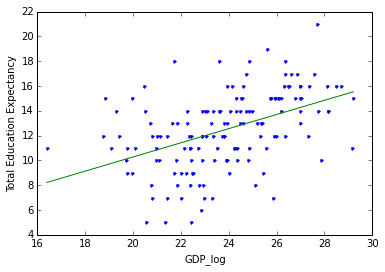

In [74]:
x2 = df_a.GDP_log
y2 = df_a.Total

m, b = np.polyfit(x2, y2, 1)

plt.plot(x2, y2, '.')
plt.plot(x2, m*x2 + b, '-')
plt.xlabel('GDP_log')
plt.ylabel('Total Education Expectancy')

There seems to be some correlation between country wealth and school life expectancy (Men vs GDP being the strongest, with an R squared of 0.248).

A correlation here makes sense, given the idea that families in wealthier countries might be able to afford to keep their children out of the workforce longer to receive all the education that is available.

It stands to reason that there could be other variables worth considering at least in addition to GDP, to get stronger predictive power for school life expectancy. Some more immediately relevant to the educational environment could be student to teacher ratios and/or schools per capita. It also should be noted that school life expectancy does not necessarily equate to educational quality.